# Demo No. 5 - Pulsations

Version 0.5 of this package models stellar pulsations as a perturbations of stellar surface in form of spherical harmonics. Therefore. this capability is limited to low amplitude pulsations within the scope of the linear approximation. Also, pulsations on the heavily distorted stellar surfaces will depart from the currently implemented solution derived for spherically symmetrical star. In conclusion, this functionality should not be used in case of overcontact systems and binary components close to filling their Roche lobe. 

The ELISa models following aspect of the stellar oscillations:

- Perturbations of kinematic quantities (position, velocity and acceleration) due to the presence of pulsations modelled using Lagrangian approach (surface grid following the motion of the matter). The amplitude of the motion is set by the velocity root mean square (RMS) amplitude set by the user. 
- Perturbation of the effective temperature. The temperature perturbation can be defined by the user. By default, in case of non-radial modes, the temperature variation amplitude can be derived from the kinematic quantity perturbation using adiabatic approximation.
- ELISa allows to model a pulsation mode with an arbitrary tilt of the mode axis. The mode axis can then stay fixed in the corrotating reference frame of the star or can be set as tidally locked with respect to the position of the binary companion.

This demo will demonstrate how to model pulsation modes on the surface of a binary component. However, the same mechanism will apply for single stars.

In [1]:
%matplotlib notebook
from elisa import units as u

from elisa import BinarySystem
from elisa import Star

# elisa also stores few useful constants
from elisa import const as c

## Generating the pulsation metadata

Pulsations modes itself are defined similarly as spots in previous demo:   

In [2]:
pulsations_meta = [
        {
            'l': 6,  # angular degree
            'm': 3,  # azimuthal order
            'amplitude': 500 * u.m/u.s,  # RMS of velocity perturbation amplitude accros the surface
            'frequency': 15 / u.d,
            # optional arguments
            'start_phase': 0.2,  # phase of the oscillations at `primary_minimum_time` T0
            'mode_axis_theta': 25 * u.deg,  # tilt angles of the pulsation axis at `primary_minimum_time` T0
            'mode_axis_phi': 90 * u.deg,
            'horizontal_to_radial_amplitude_ratio': 0.1,  # displacement amplitude ratio otherwise calculated from adiabatic approximation
            'temperature_perturbation_phase_shift': c.PI/3 * u.rad,  # (default value) phase lag between temperature and radial displacement complex amplitudes
            'temperature_amplitude_factor': 0.01,  # ratio delta T/T_eff, calculated from adiabatic approximation by default
            'tidally_locked': False  # (default value) if true, the mode axis will hold position relative to companion
        },  # user may choose to define as much of pulsation modes as he likes
    ]

Each pulsation mode is defined by the angular degree `l`, azimuthal order `m`, radial amplitude of the effective temperature perturbation `amplitude`, mode frequency `frequency`and `start_phase` of the given mode at photometric phase 0.
In case of the missalligned mode, where the mode axis is not parallel with axis of rotation, mode axis can be defined by the angular spherical coordinates of the mode axis at photometric phase 0 using parameters `mode_axis_theta` and `mode_axis_phi`.

## Generating a binary system

Pulsation mode data are also passed to the binary system component in the form of the keyword argument `pulsations`:

In [3]:
primary = Star(
    mass=2.15 * u.solMass,
    surface_potential=5.0,
    synchronicity=1.0,
    t_eff=10000 * u.K,
    gravity_darkening=1.0,
    discretization_factor=3, 
    albedo=0.6,
    metallicity=0.0,
    pulsations = pulsations_meta  # here we declared the pulsation modes on the primary component
)

secondary = Star(
    mass=1.2 * u.solMass,
    surface_potential=7.0,
    synchronicity=1.0,
    t_eff=7000 * u.K,
    gravity_darkening=1.0,
    # discretization_factor=20,
    albedo=0.6,
    metallicity=0,  # similarly, pulsation modes can be added to the secondary component as well
)

bs = BinarySystem(
    primary=primary,
    secondary=secondary,
    argument_of_periastron=58 * u.deg,
    gamma=-30.7 * u.km / u.s,
    period=1.7 * u.d,
    eccentricity=0.0,
    inclination=90 * u.deg,
    primary_minimum_time=2440000.0 * u.d,
    phase_shift=0.0,
)

2021-09-07 09:38:16,375 - 7833 - pulse.mode - INFO: initialising object PulsationMode
2021-09-07 09:38:16,380 - 7833 - binary_system.system - INFO: initialising object BinarySystem
2021-09-07 09:38:16,448 - 7833 - binary_system.system - INFO: setting discretization factor of secondary component to 8.00 according to discretization factor of the companion.


## Accessing the basic properties of a PulsationMode

Each of the pulsational modes defined in `pulsations_meta` are now stored along with its index in a dictionary as a separate objects within our pulsating component which can be accessed here: 

In [4]:
bs.primary.pulsations

{0: <elisa.pulse.mode.PulsationMode at 0x7f1f746cb8d0>}

Each parameter of given pulsation mode is stored as an atribute of `PulsationMode` object. Parameters `mode_axis_theta`, `mode_axis_phi`, `start_phase` and `temperature_perturbation_phase_shift` are optional and they have their default fallback values:

In [5]:
pm = bs.primary.pulsations[0]

print('Parameters of the pulsation mode: \n'
      f'l = {pm.l}, m = {pm.m}, \n'
      f'amplitude = {pm.amplitude * u.VELOCITY_UNIT}, frequency = {pm.frequency * u.FREQUENCY_UNIT:.3},\n' 
      f'mode_axis_theta = {pm.mode_axis_theta:.3}, mode_axis_phi = {pm.mode_axis_phi:.3}, \n'
      f'horizontal_to_radial_amplitude_ratio = {pm.horizontal_to_radial_amplitude_ratio:3}, \n'
      f'temperature_perturbation_phase_shift = {pm.temperature_perturbation_phase_shift:.3}, \n'
      f'start_phase = {pm.start_phase:.3}')

Parameters of the pulsation mode: 
l = 6, m = 3, 
amplitude = 500.0 m / s, frequency = 0.000174 Hz,
mode_axis_theta = 0.436, mode_axis_phi = 1.57, 
horizontal_to_radial_amplitude_ratio = 0.1, 
temperature_perturbation_phase_shift = 1.05, 
start_phase = 0.2


Each PulsationMode object also contains parameters derived from input parameters of the mode. They can be accesed similarly as parameters defined by the user:

In [6]:
print('Derived parameters: \n'
      f'radial_relative_amplitude (\delta r_r) = {pm.radial_amplitude * u.DISTANCE_UNIT:.3}, \n'
      f'horizontal_relative_amplitude (\delta r_h) = {pm.horizontal_amplitude * u.DISTANCE_UNIT:.3}, \n'
      f'angular_frequency = {pm.angular_frequency * u.ANGULAR_FREQUENCY_UNIT:.3} \n'
     )

Derived parameters: 
radial_relative_amplitude (\delta r_r) = 4.56e+05 m, 
horizontal_relative_amplitude (\delta r_h) = 4.56e+04 m, 
angular_frequency = 0.00109 rad / s 



## Visualizing the output

2021-09-07 09:38:17,118 - 7833 - observer.observer - INFO: initialising Observer instance


<IPython.core.display.Javascript object>


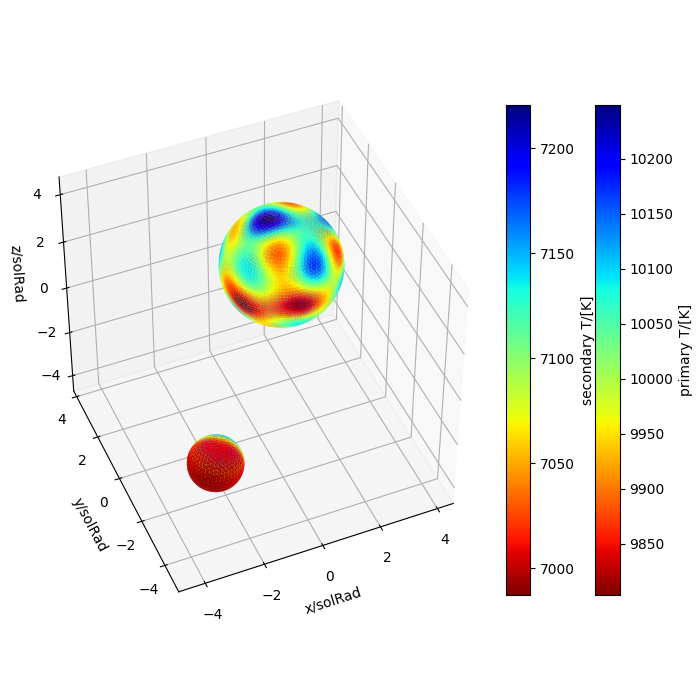

In [7]:
bs.plot.surface(phase=0.15,  # photometric phase
                colormap='temperature',
                axis_unit=u.solRad,
                elevation=60
               )

The perturbations on the pulsating component can be visualized in detail:

2021-09-07 09:38:18,331 - 7833 - observer.observer - INFO: initialising Observer instance


<IPython.core.display.Javascript object>


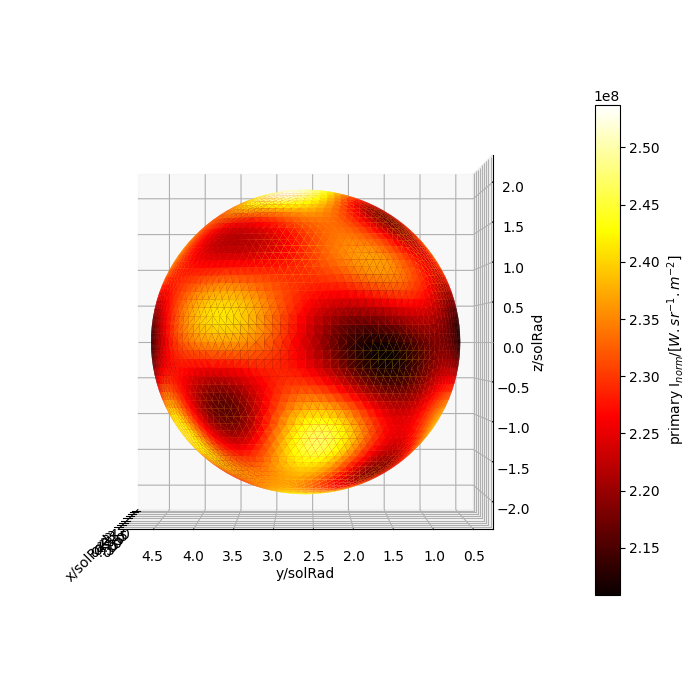

In [8]:
bs.plot.surface(
    phase=0.15,
    components_to_plot='primary',
    # colormap='radius',
    # colormap='horizontal_displacement',
    # colormap='velocity',
    # colormap='radial_velocity',
    # colormap='v_r_perturbed',
    # colormap='v_horizontal_perturbed',
    # colormap='gravity_acceleration',
    # colormap='horizontal_acceleration',
    # colormap='temperature',
    # colormap='radiance',
    colormap='normal_radiance',
    # scale='log',
    # edges=True,
    axis_unit=u.solRad,
    # colorbar_unit=u.solRad,
    # colorbar_unit=u.km / u.s,
    # colorbar_unit=u.m / u.s**2,
    # unit=u.W/(u.sr * u.m**2),
    # unit=u.solRad,
    subtract_equilibrium=True  # subtracting equilibrium quantity from the colormap distribution
)